# 1. Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 2. Functions

In [2]:

def create_3d_surface_plot(df, col1, col2, col3, fig, ax, label):
    # Get data as NumPy arrays
    x = np.array(df.iloc[:, col1])
    y = np.array(df.iloc[:, col2])
    z = np.array(df.iloc[:, col3])

    # Create the meshgrid and interpolate z values
    x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
    z_grid = np.interp(x_grid.flatten(), x, z)
    z_grid = z_grid.reshape(x_grid.shape)

    # Plot the surface using 3D projection
    surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.7, label=label)

    # Annotate lowest and highest z points
    idx_min_z = np.argmin(z)
    idx_max_z = np.argmax(z)
    ax.scatter(x[idx_min_z], y[idx_min_z], z[idx_min_z], color='red', s=100, label='Lowest Z')  # Lowest Z point
    ax.scatter(x[idx_max_z], y[idx_max_z], z[idx_max_z], color='green', s=100, label='Highest Z')  # Highest Z point

    # Set labels (assuming labels are in the dataframe columns)
    ax.set_xlabel(df.columns[col1])
    ax.set_ylabel(df.columns[col2])
    ax.set_zlabel(df.columns[col3])

    return surf


In [3]:

def plot_3d_surface_combos(gate_type,gate_data, param_combos, save_location=None):
    # Create the figure
    fig = plt.figure(figsize=(14,8))
    fig.suptitle(f'3D Surface Plots for {gate_type} gate', fontsize=20,fontweight='bold',fontstyle='italic')  # General title

    # Loop through parameter combinations and create plots
    for i, (col1, col2, col3) in enumerate(param_combos):
        label = f"{gate_data.columns[col1]} vs. {gate_data.columns[col2]}"  # Adjust label format as needed

        # Add subplots in a 3x2 grid
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        surf = create_3d_surface_plot(gate_data, col1, col2, col3, fig, ax, label)

    # Add common colorbar (optional)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Adjust layout
    plt.tight_layout()

    # Save or show the plot
    if save_location:
        plt.savefig(save_location)
    else:
        plt.show()


# 3. Generating plots to analyse leakage for different gates

## 3.1 Inverter

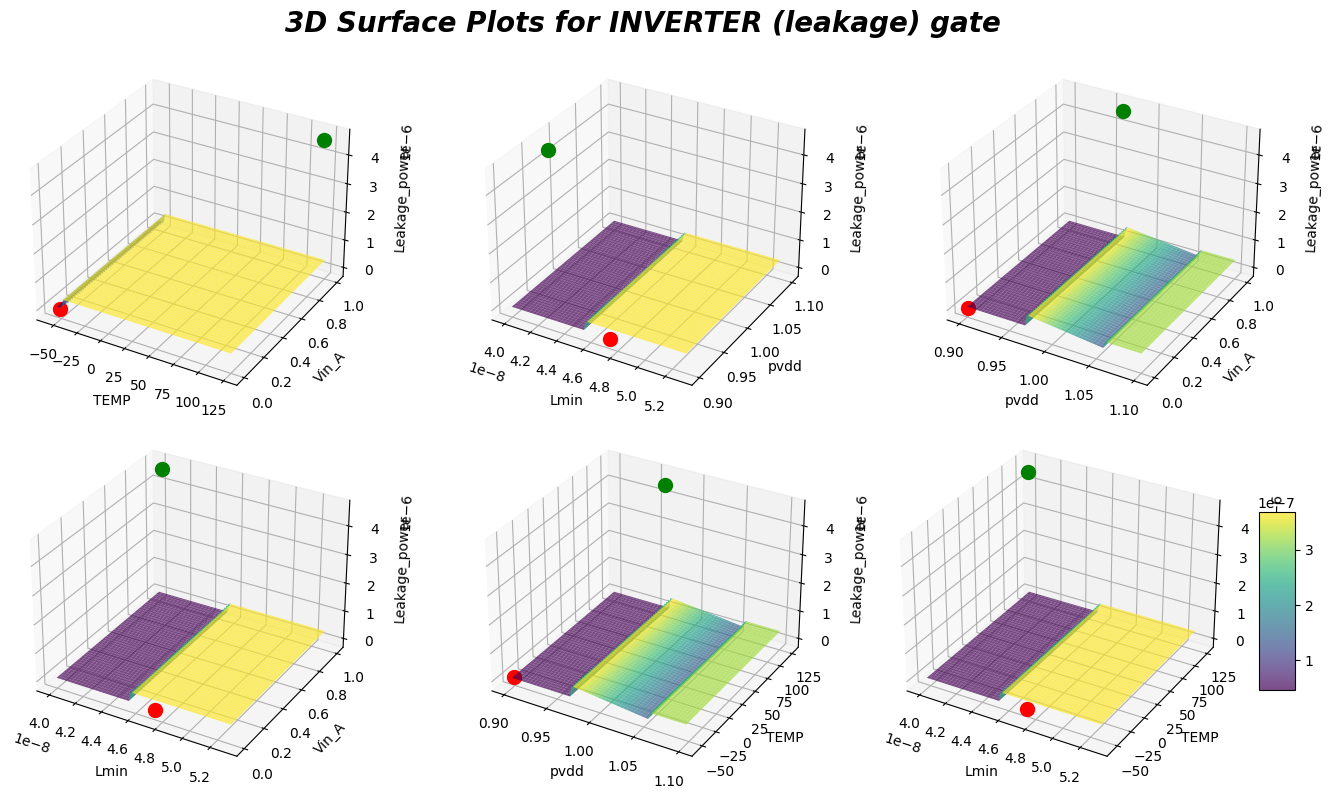

In [4]:
file_path = 'INVERTER_leakage.csv'
df_inverter = pd.read_csv(file_path)

param_combos = [  # List of parameter combinations (col1, col2, col3) for all gates
    (1, 0, 17),  # pvdd vs. Temperature vs. leakage
    (3, 2, 17),  # Lmin vs. Cqload vs. leakage
    (2, 0, 17),  # Cqload vs. Temperature vs. leakage
    (3, 0, 17),  # Lmin vs. Temperature vs. leakage
    (2, 1, 17),  # Cqload vs. pvdd vs. leakage
    (3, 1, 17),  # Lmin vs. pvdd vs. leakage
]

plot_3d_surface_combos('INVERTER (leakage)',df_inverter, param_combos, '3D_Plots/22_nm_MGK_INVERTER_leakage_3dplot.png')


## 3.2 AND2

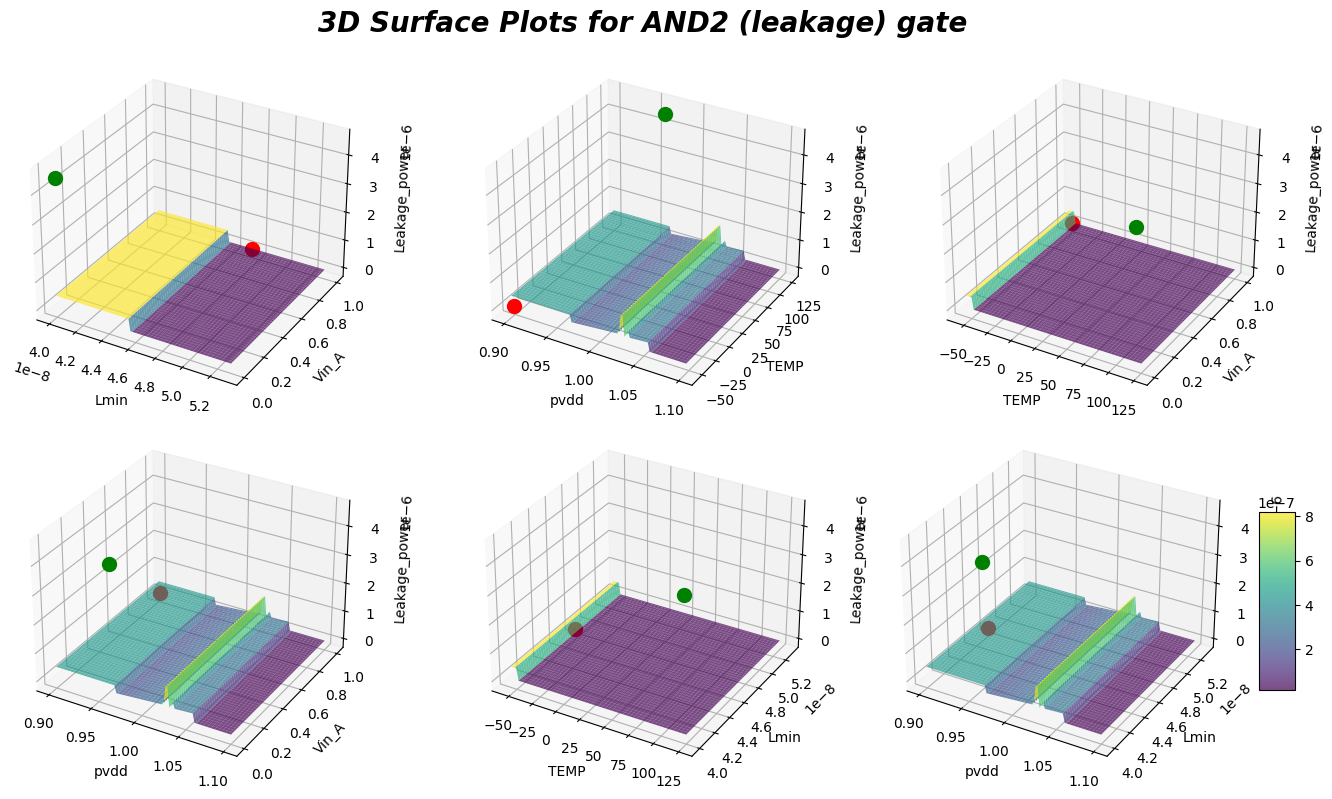

In [5]:
file_path = 'AND_2_leakage.csv'
df_and2 = pd.read_csv(file_path)

param_combos = [  # List of parameter combinations (col1, col2, col3) for all gates
    (4, 0, 18),  # pvdd vs. Temperature vs. leakage
    (3, 2, 18),  # Lmin vs. Cqload vs. leakage
    (2, 0, 18),  # Cqload vs. Temperature vs. leakage
    (3, 0, 18),  # Lmin vs. Temperature vs. leakage
    (2, 4, 18),  # Cqload vs. pvdd vs. leakage
    (3, 4, 18),  # Lmin vs. pvdd vs. leakage
]


plot_3d_surface_combos('AND2 (leakage)',df_and2, param_combos, '3D_Plots/22_nm_MGK_AND2_leakage_3dplot.png')


## 3.3 AND3

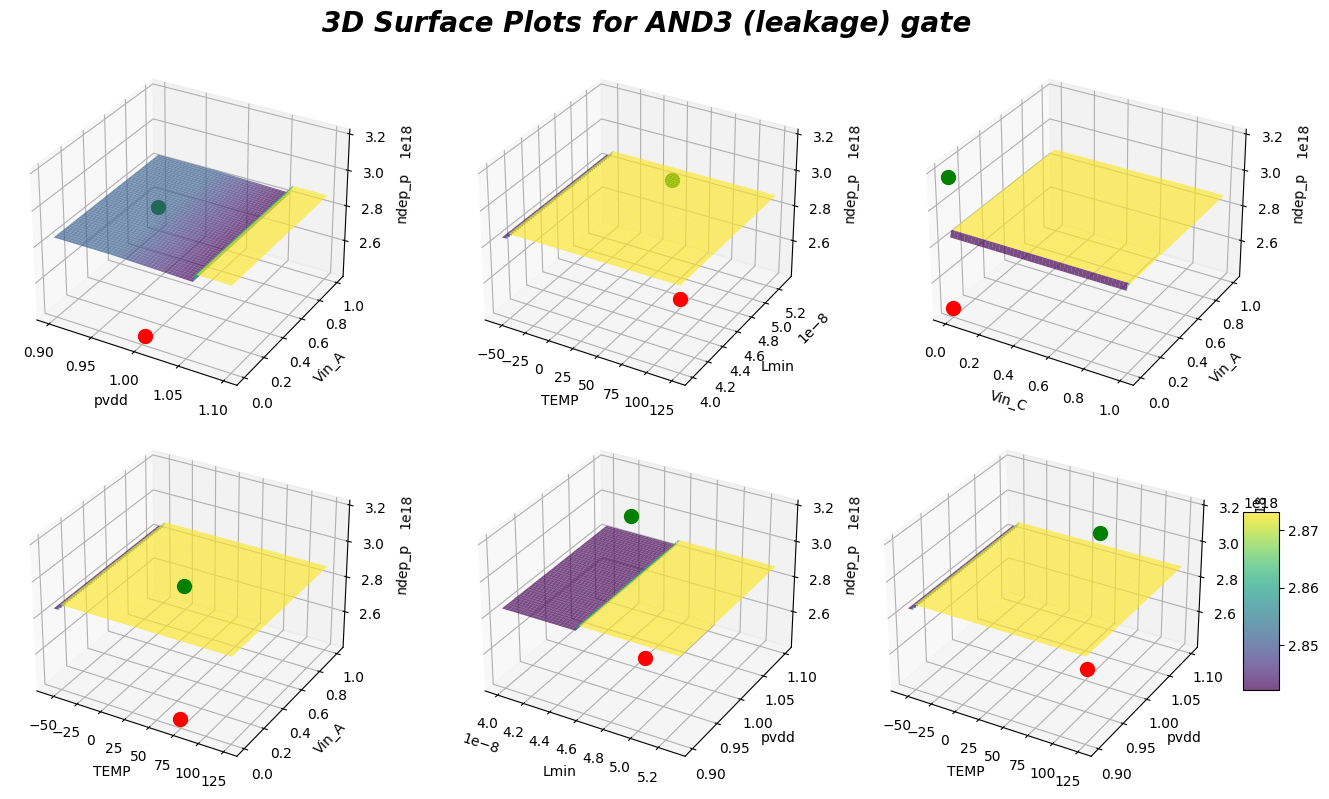

In [6]:
file_path = 'AND_3_leakage.csv'
df_and3 = pd.read_csv(file_path)
param_combos = [  # List of parameter combinations (col1, col2, col3) for all gates
    (4, 0, 18),  # pvdd vs. Temperature vs. leakage
    (3, 5, 18),  # Lmin vs. Cqload vs. leakage
    (2, 0, 18),  # Cqload vs. Temperature vs. leakage
    (3, 0, 18),  # Lmin vs. Temperature vs. leakage
    (5, 4, 18),  # Cqload vs. pvdd vs. leakage
    (3, 4, 18),  # Lmin vs. pvdd vs. leakage
]

plot_3d_surface_combos('AND3 (leakage)',df_and3, param_combos, '3D_Plots/22_nm_MGK_AND3_leakage_3dplot.png')


## 3.4 OR2

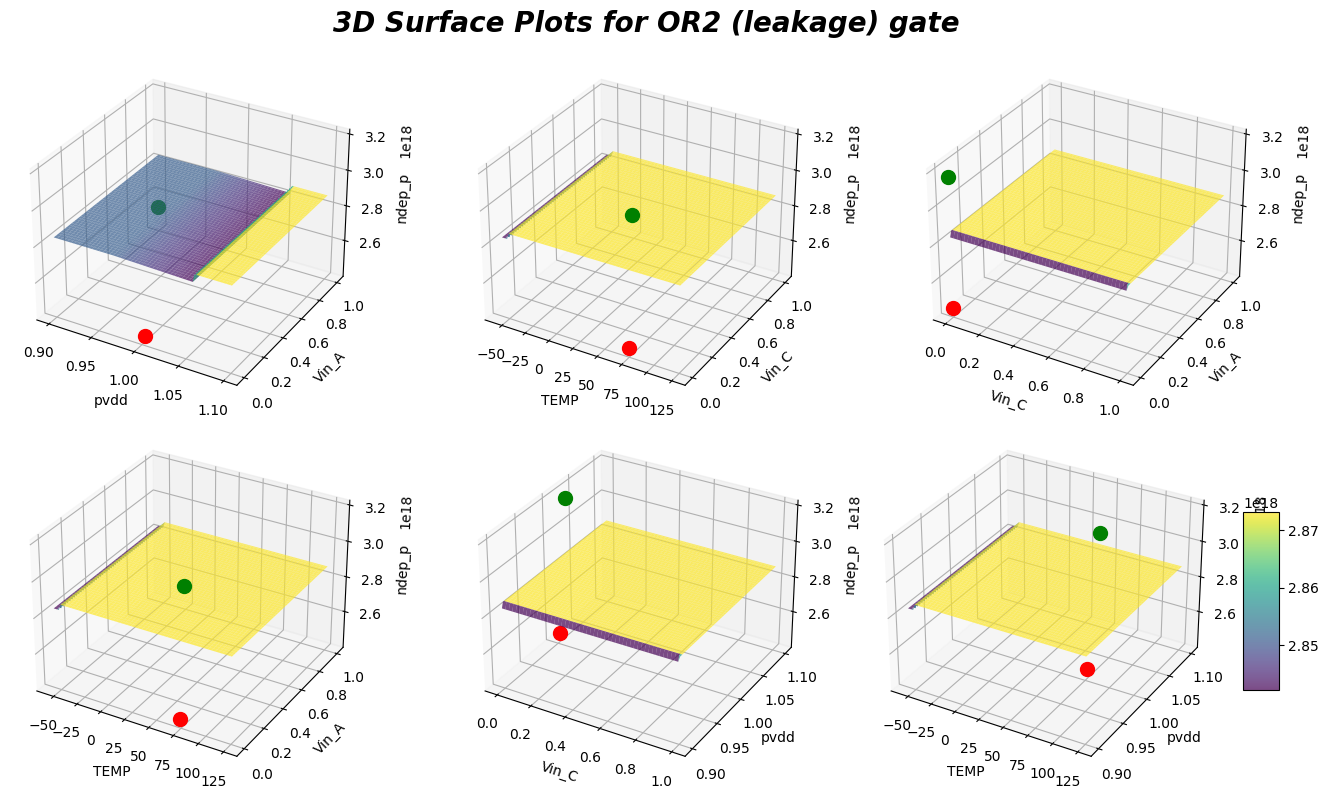

In [7]:
file_path = 'OR_2_leakage.csv'
df_or2 = pd.read_csv(file_path)
param_combos = [  # List of parameter combinations (col1, col2, col3) for all gates
    (4, 0, 18),  # pvdd vs. Temperature vs. leakage
    (3, 2, 18),  # Lmin vs. Cqload vs. leakage
    (2, 0, 18),  # Cqload vs. Temperature vs. leakage
    (3, 0, 18),  # Lmin vs. Temperature vs. leakage
    (2, 4, 18),  # Cqload vs. pvdd vs. leakage
    (3, 4, 18),  # Lmin vs. pvdd vs. leakage
]

plot_3d_surface_combos('OR2 (leakage)',df_and3, param_combos, '3D_Plots/22_nm_MGK_OR2_leakage_3dplot.png')


## 3.5 XOR

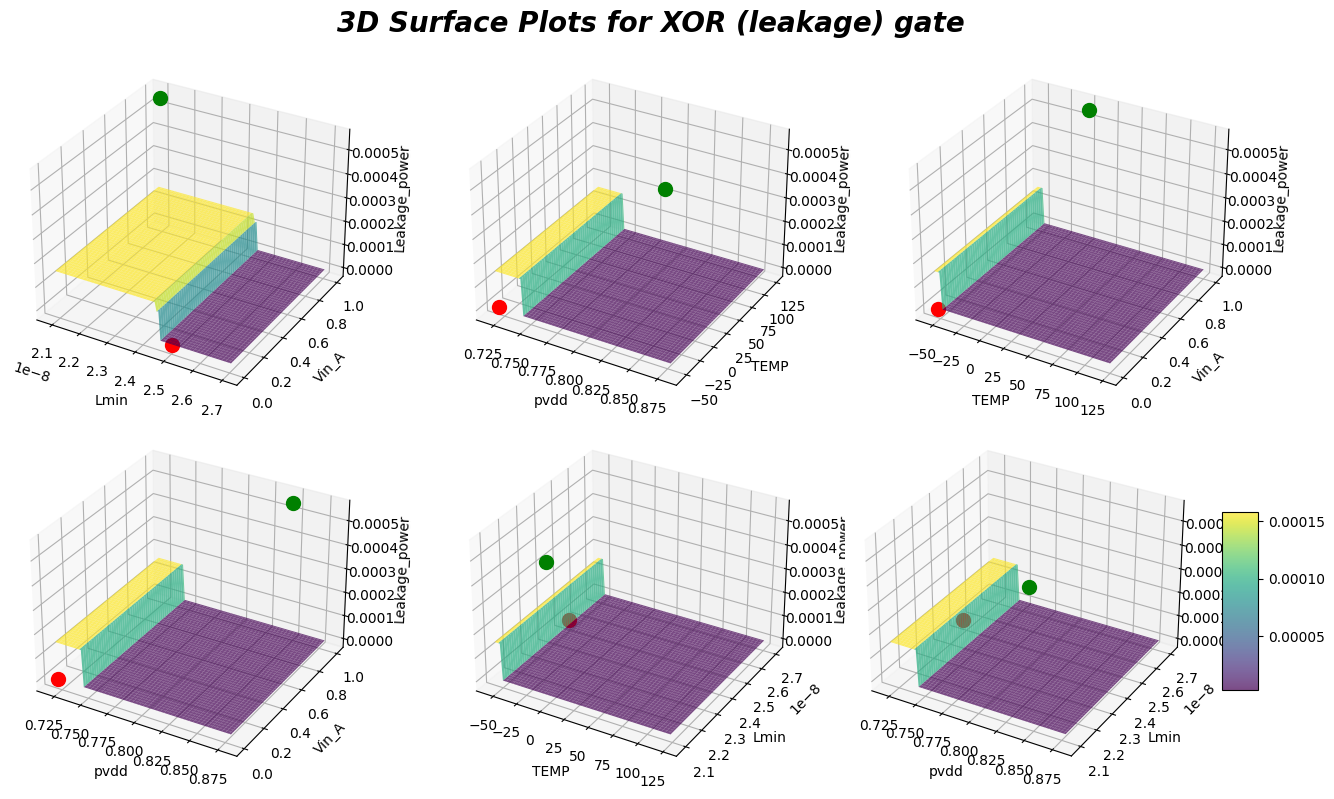

In [8]:
file_path = 'XOR_leakage.csv'
df_xor = pd.read_csv(file_path)
param_combos = [  # List of parameter combinations (col1, col2, col3) for all gates
    (4, 0, 18),  # pvdd vs. Temperature vs. leakage
    (3, 2, 18),  # Lmin vs. Cqload vs. leakage
    (2, 0, 18),  # Cqload vs. Temperature vs. leakage
    (3, 0, 18),  # Lmin vs. Temperature vs. leakage
    (2, 4, 18),  # Cqload vs. pvdd vs. leakage
    (3, 4, 18),  # Lmin vs. pvdd vs. leakage
]

plot_3d_surface_combos('XOR (leakage)',df_xor, param_combos, '3D_Plots/22_nm_MGK_XOR_leakage_3dplot.png')
